In [314]:
import numpy as np


def problem1_inversion(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections

    samples = []

    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        g_x = 1 / np.exp(x)
        f_x = (np.exp(x ** 2) - 1) / (np.e - 1)

        if u < f_x / (10 * g_x):
            samples.append(x)

    # Return a numpy array of length n_samples
    return np.array(samples)

In [315]:
# Part 2

problem1_samples = problem1_inversion(100000)

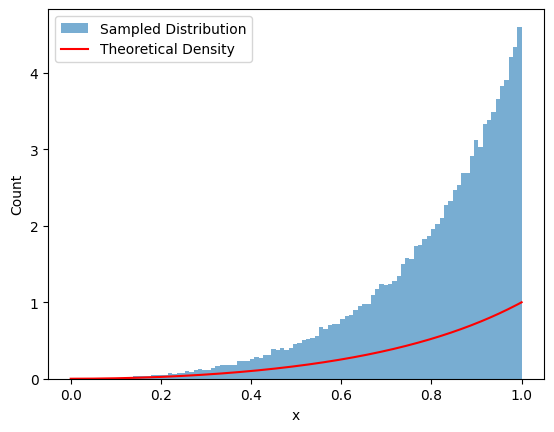

In [278]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 500)
theoretical_density = (np.exp(x ** 2) - 1) / (np.e - 1)

plt.hist(problem1_samples, bins=100, label="Sampled Distribution", density=True, alpha=0.6)
plt.plot(x, theoretical_density, label="Theoretical Density", color="red")

plt.xlabel("x")
plt.ylabel("Count")
plt.legend()
plt.show()

In [285]:
# Part 3

integrand = lambda x: np.sin(x) * ((2 * np.exp(x ** 2) * x) / (np.e - 1))
problem1_integral = np.mean([integrand(xi) for xi in problem1_samples])
problem1_integral

np.float64(1.5076827745067112)

In [287]:
b = np.max([integrand(xi) for xi in problem1_samples]) - np.min([integrand(xi) for xi in problem1_samples])
epsilon = np.sqrt(np.log(2 / 0.05) * b ** 2 / (2 * len(problem1_samples)))
problem1_interval = (problem1_integral - epsilon, problem1_integral + epsilon)
problem1_interval

(np.float64(1.4962584340228267), np.float64(1.5191071149905957))

In [316]:
# Part 5
def problem1_inversion_2(n_samples=1):
    # Distribution from part 2
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections

    samples = []

    while len(samples) < n_samples:
        x = np.random.uniform(0, 1 / 20)
        u = np.random.uniform(0, 1)
        g_x = np.exp(x) / 5
        f_x = 20 * x * np.exp(20 - (1 / x))
        # print(g_x, f_x)

        if u < f_x / (1 * g_x):
            samples.append(x)

    # Return a numpy array of length n_samples
    return np.array(samples)

In [317]:
problem5_samples = problem1_inversion_2(100000)

In [318]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np

try:
    assert (isinstance(problem1_inversion(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")
try:
    assert (isinstance(problem1_samples, np.ndarray))
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")
try:
    assert (isinstance(problem1_integral, float))
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")
try:
    assert (isinstance(problem1_interval, list) or isinstance(problem1_interval,
                                                              tuple)), "problem1_interval not a tuple or list"
    assert (
            len(problem1_interval) == 2), "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")
try:
    assert (isinstance(problem1_inversion_2(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_inversion_2 returns a numpy array


In [327]:
# PART 1
#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A = np.array([[0.8, 0.2, 0, 0], [0.6, 0.2, 0.2, 0], [0, 0.4, 0, 0.6], [0, 0, 0.8, 0.2]])
problem3_B = np.array([[0, 0.2, 0, 0.8], [0, 0, 1, 0], [0, 1, 0, 0], [0.5, 0, 0.5, 0]])
problem3_C = np.array(
    [[0.2, 0.3, 0, 0, 0.5], [0.2, 0.2, 0.6, 0, 0], [0, 0.4, 0, 0.6, 0], [0, 0, 0, 0.6, 0.4], [0, 0, 0, 0.4, 0.6]])
problem3_D = np.array([[0.8, 0.2, 0, 0], [0.6, 0.2, 0.2, 0], [0, 0.4, 0, 0.6], [0.1, 0, 0.7, 0.2]])

In [328]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

problem3_A_irreducible = np.all(np.linalg.matrix_power(problem3_A, len(problem3_A[0])) > 0)
problem3_B_irreducible = np.all(np.linalg.matrix_power(problem3_B, len(problem3_B[0])) > 0)
problem3_C_irreducible = np.all(np.linalg.matrix_power(problem3_C, len(problem3_C[0])) > 0)
problem3_D_irreducible = np.all(np.linalg.matrix_power(problem3_D, len(problem3_D[0])) > 0)

In [330]:



def is_aperiodic(transition_matrix):
    """
    Determines if a Markov chain with the given transition matrix is aperiodic.

    Args:
        transition_matrix (numpy.ndarray): The transition matrix.

    Returns:
        bool: True if the chain is aperiodic, False otherwise.
    """
    n = len(transition_matrix)
    periods = []

    for state in range(n):
        # Find all steps where the state can return to itself
        visits = []
        current_power = np.eye(n)  # Start with P^0
        for step in range(1, n * n):  # Arbitrary large number of steps
            current_power = np.dot(current_power, transition_matrix)  # Compute P^step
            if current_power[state, state] > 0:  # Check if state can return
                visits.append(step)

        if not visits:
            return False  # If no visits, the chain is not irreducible

        # Compute GCD of all visits to determine period
        state_period = reduce(gcd, visits)
        periods.append(state_period)

    # If the GCD of all state periods is 1, the chain is aperiodic
    return reduce(gcd, periods) == 1

In [331]:
import numpy as np


def find_period(transition_matrix, state, max_steps=100):
    """
    Finds the period of a given state in the Markov chain.

    Args:
        transition_matrix (numpy.ndarray): The transition matrix.
        state (int): The state for which to compute the period.
        max_steps (int): The maximum number of steps to consider.

    Returns:
        int: The period of the state.
    """
    n = len(transition_matrix)
    current_power = np.eye(n)  # Start with P^0 (identity matrix)
    return_times = []

    for step in range(1, max_steps + 1):
        current_power = np.dot(current_power, transition_matrix)  # Compute P^step
        if current_power[state, state] > 0:  # Check if the state can return
            return_times.append(step)

    if not return_times:
        return None  # No returns found within max_steps

    # Compute the GCD of all return times
    return reduce(gcd, return_times)


# Example usage
P = np.array([
    [0.5, 0.5, 0.0],
    [0.5, 0.0, 0.5],
    [0.0, 0.5, 0.5]
])

state = 0
period = find_period(P, state)
print(f"The period of state {state} is {period}")

The period of state 0 is 1


In [337]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = is_aperiodic(problem3_A)
problem3_B_is_aperiodic = is_aperiodic(problem3_B)
problem3_C_is_aperiodic = is_aperiodic(problem3_C)
problem3_D_is_aperiodic = is_aperiodic(problem3_D)

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = np.array(find_period(problem3_A, 0))
problem3_B_periods = find_period(problem3_B, 0)
problem3_C_periods = find_period(problem3_C, 0)
problem3_D_periods = find_period(problem3_D, 0)

In [338]:
problem3_A_periods

array(1)

In [339]:
import numpy as np
from math import gcd
from functools import reduce


def find_periods(transition_matrix, max_steps=100):
    """
    Finds the periods of all states in the Markov chain.

    Args:
        transition_matrix (numpy.ndarray): Transition matrix of shape (n_states, n_states).
        max_steps (int): Maximum number of steps to consider for computing the periods.

    Returns:
        numpy.ndarray: Array of periods for each state.
    """
    n_states = len(transition_matrix)
    periods = []

    for state in range(n_states):
        current_power = np.eye(n_states)
        return_times = []

        for step in range(1, max_steps + 1):
            current_power = np.dot(current_power, transition_matrix)
            if current_power[state, state] > 0:
                return_times.append(step)

        if return_times:
            periods.append(reduce(gcd, return_times))
        else:
            periods.append(None)  # No return found within max_steps

    return np.array(periods)


def is_aperiodic(periods):
    """
    Checks if the Markov chain is aperiodic based on the periods.

    Args:
        periods (numpy.ndarray): Array of periods for each state.

    Returns:
        bool: True if all states have a period of 1, False otherwise.
    """
    return np.all(periods == 1)


# Transition matrices
problem3_A = np.array([[0.8, 0.2, 0, 0], [0.6, 0.2, 0.2, 0], [0, 0.4, 0, 0.6], [0, 0, 0.8, 0.2]])
problem3_B = np.array([[0, 0.2, 0, 0.8], [0, 0, 1, 0], [0, 1, 0, 0], [0.5, 0, 0.5, 0]])
problem3_C = np.array(
    [[0.2, 0.3, 0, 0, 0.5], [0.2, 0.2, 0.6, 0, 0], [0, 0.4, 0, 0.6, 0], [0, 0, 0, 0.6, 0.4], [0, 0, 0, 0.4, 0.6]])
problem3_D = np.array([[0.8, 0.2, 0, 0], [0.6, 0.2, 0.2, 0], [0, 0.4, 0, 0.6], [0.1, 0, 0.7, 0.2]])

# Compute periods
problem3_A_periods = find_periods(problem3_A)
problem3_B_periods = find_periods(problem3_B)
problem3_C_periods = find_periods(problem3_C)
problem3_D_periods = find_periods(problem3_D)

# Check aperiodicity
problem3_A_is_aperiodic = is_aperiodic(problem3_A_periods)
problem3_B_is_aperiodic = is_aperiodic(problem3_B_periods)
problem3_C_is_aperiodic = is_aperiodic(problem3_C_periods)
problem3_D_is_aperiodic = is_aperiodic(problem3_D_periods)

# Outputs
print("Aperiodic Check:")
print(f"problem3_A_is_aperiodic = {problem3_A_is_aperiodic}")
print(f"problem3_B_is_aperiodic = {problem3_B_is_aperiodic}")
print(f"problem3_C_is_aperiodic = {problem3_C_is_aperiodic}")
print(f"problem3_D_is_aperiodic = {problem3_D_is_aperiodic}")

print("\nPeriods:")
print(f"problem3_A_periods = {problem3_A_periods}")
print(f"problem3_B_periods = {problem3_B_periods}")
print(f"problem3_C_periods = {problem3_C_periods}")
print(f"problem3_D_periods = {problem3_D_periods}")

Aperiodic Check:
problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = True
problem3_D_is_aperiodic = True

Periods:
problem3_A_periods = [1 1 1 1]
problem3_B_periods = [2 2 2 2]
problem3_C_periods = [1 1 1 1 1]
problem3_D_periods = [1 1 1 1]


In [ ]:



def stationary_distribution(P):
    """
    Compute the stationary distribution of a Markov chain, if it exists.

    Args:
        P (numpy.ndarray): Transition matrix (n_states x n_states).

    Returns:
        tuple: (has_stationary, stationary_distribution)
               - has_stationary (bool): True if stationary distribution exists.
               - stationary_distribution (numpy.ndarray or False): Stationary distribution
                 vector, or False if it doesn't exist.
    """
    n_states = P.shape[0]

    # Check irreducibility and aperiodicity
    has_stationary = is_irreducible(P) and is_aperiodic(P)
    if not has_stationary:
        return False, False

    # Solve for stationary distribution
    A = np.vstack((P.T - np.eye(n_states), np.ones(n_states)))
    b = np.append(np.zeros(n_states), 1)

    try:
        stationary_dist = np.linalg.lstsq(A, b, rcond=None)[0]
        return True, stationary_dist
    except np.linalg.LinAlgError:
        return False, False


def is_irreducible(P):
    """
    Check if the Markov chain is irreducible.

    Args:
        P (numpy.ndarray): Transition matrix.

    Returns:
        bool: True if irreducible, False otherwise.
    """
    n_states = len(P)
    reachability = np.linalg.matrix_power(P, n_states - 1) > 0
    return np.all(reachability)


def is_aperiodic(P):
    """
    Check if the Markov chain is aperiodic.

    Args:
        P (numpy.ndarray): Transition matrix.

    Returns:
        bool: True if aperiodic, False otherwise.
    """
    periods = find_state_periods(P)
    return all(period == 1 for period in periods)

In [340]:
import numpy as np


class MarkovChain:
    def __init__(self, transition_matrix):
        """
        Initialize the MarkovChain class with a given transition matrix.

        Args:
            transition_matrix (numpy.ndarray): The transition matrix of the Markov chain.
        """
        self.P = np.array(transition_matrix)
        self.n_states = self.P.shape[0]
        if self.P.shape[0] != self.P.shape[1]:
            raise ValueError("Transition matrix must be square.")

    def is_irreducible(self):
        """
        Check if the Markov chain is irreducible.

        Returns:
            bool: True if irreducible, False otherwise.
        """
        reachability = np.linalg.matrix_power(self.P, self.n_states - 1) > 0
        return np.all(reachability)

    def is_aperiodic(self):
        """
        Check if the Markov chain is aperiodic.

        Returns:
            tuple: (bool, numpy.ndarray)
                - bool: True if the Markov chain is aperiodic, False otherwise.
                - numpy.ndarray: Periods of each state.
        """

        def gcd(a, b):
            while b:
                a, b = b, a % b
            return a

        def lcm(a, b):
            return a * b // gcd(a, b)

        periods = np.zeros(self.n_states, dtype=int)
        for state in range(self.n_states):
            visited = set()
            stack = [(state, 0)]
            while stack:
                current, depth = stack.pop()
                if current == state and depth > 0:
                    periods[state] = gcd(periods[state], depth) if periods[state] else depth
                elif current not in visited:
                    visited.add(current)
                    neighbors = np.where(self.P[current] > 0)[0]
                    stack.extend((neighbor, depth + 1) for neighbor in neighbors)
        aperiodic = np.all(periods == 1)
        return aperiodic, periods

    def stationary_distribution(self):
        """
        Compute the stationary distribution of the Markov chain, if it exists.

        Returns:
            tuple: (bool, numpy.ndarray or None)
                - bool: True if the Markov chain has a stationary distribution, False otherwise.
                - numpy.ndarray or None: The stationary distribution vector if it exists, otherwise None.
        """
        if not self.is_irreducible():
            return False, None
        A = np.vstack((self.P.T - np.eye(self.n_states), np.ones(self.n_states)))
        b = np.append(np.zeros(self.n_states), 1)
        try:
            stationary_dist = np.linalg.lstsq(A, b, rcond=None)[0]
            return True, stationary_dist
        except np.linalg.LinAlgError:
            return False, None

    def is_reversible(self):
        """
        Check if the Markov chain is reversible.

        Returns:
            bool: True if reversible, False otherwise.
        """
        has_stationary, stationary_dist = self.stationary_distribution()
        if not has_stationary:
            return False
        for i in range(self.n_states):
            for j in range(self.n_states):
                if not np.isclose(stationary_dist[i] * self.P[i, j], stationary_dist[j] * self.P[j, i]):
                    return False
        return True

    def analyze(self):
        """
        Analyze the Markov chain and return all results.

        Returns:
            dict: A dictionary with results for all questions.
        """
        irreducible = self.is_irreducible()
        aperiodic, periods = self.is_aperiodic()
        has_stationary, stationary_dist = self.stationary_distribution()
        reversible = self.is_reversible()
        return {
            "Transition Matrix": self.P,
            "Irreducible": irreducible,
            "Aperiodic": aperiodic,
            "Periods": periods,
            "Has Stationary Distribution": has_stationary,
            "Stationary Distribution": stationary_dist if has_stationary else None,
            "Reversible": reversible,
        }

In [341]:
# Example Transition Matrix
P = np.array([
    [0.8, 0.2, 0.0],
    [0.1, 0.7, 0.2],
    [0.0, 0.3, 0.7]
])

# Create a MarkovChain object
mc = MarkovChain(P)

# Analyze the Markov chain
results = mc.analyze()

# Print results
for key, value in results.items():
    print(f"{key}: {value}")

Transition Matrix: [[0.8 0.2 0. ]
 [0.1 0.7 0.2]
 [0.  0.3 0.7]]
Irreducible: True
Aperiodic: True
Periods: [1 1 1]
Has Stationary Distribution: True
Stationary Distribution: [0.23076923 0.46153846 0.30769231]
Reversible: True
